<a href="https://colab.research.google.com/github/reda-maizate/flowers_recognition/blob/master/flowers_recognition_v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
from google.colab import files
files.upload()

{}

In [2]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
'chmod 600 /root/.kaggle/kaggle.json'
!pwd
!kaggle datasets download -d alxmamaev/flowers-recognition
!unzip flowers-recognition.zip

Le flux de sortie a été tronqué et ne contient que les 5000 dernières lignes.
  inflating: flowers/flowers/rose/11102341464_508d558dfc_n.jpg  
  inflating: flowers/flowers/rose/11233672494_d8bf0a3dbf_n.jpg  
  inflating: flowers/flowers/rose/11694025703_9a906fedc1_n.jpg  
  inflating: flowers/flowers/rose/118974357_0faa23cce9_n.jpg  
  inflating: flowers/flowers/rose/11944957684_2cc806276e.jpg  
  inflating: flowers/flowers/rose/12165480946_c4a3fe182d_n.jpg  
  inflating: flowers/flowers/rose/12202373204_34fb07205b.jpg  
  inflating: flowers/flowers/rose/12238827553_cf427bfd51_n.jpg  
  inflating: flowers/flowers/rose/12240165555_98625b1e88_n.jpg  
  inflating: flowers/flowers/rose/12240303_80d87f77a3_n.jpg  
  inflating: flowers/flowers/rose/12240577184_b0de0e53ea_n.jpg  
  inflating: flowers/flowers/rose/12243068283_ee4c2683e2_n.jpg  
  inflating: flowers/flowers/rose/12243069253_e512464095_n.jpg  
  inflating: flowers/flowers/rose/123128873_546b8b7355_n.jpg  
  inflating: flowers/fl

In [12]:
import os
import pandas as pd
# !pip install fastai --upgrade
from fastai.vision.all import *
from fastai.metrics import *
from fastai.vision.widgets import *
import shutil

# %rm -r '/content/flowers/flowers'

In [2]:
data_dir = '/content/flowers/'

In [3]:
flowers = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=RandomResizedCrop(224, min_scale=0.5),
    batch_tfms=aug_transforms(),
)

In [4]:
dls = flowers.dataloaders(data_dir, bs=32)

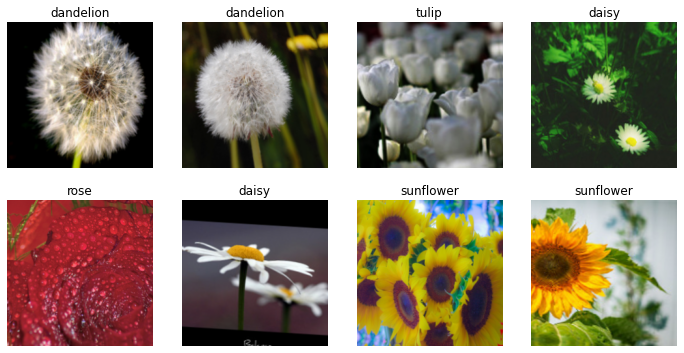

In [5]:
dls.train.show_batch(max_n=8, nrows=2)

In [6]:
learn = cnn_learner(dls, resnet18, metrics=[error_rate, accuracy])
learn.fine_tune(4)

epoch,train_loss,valid_loss,error_rate,accuracy,time
0,0.897244,0.417607,0.136574,0.863426,00:28


epoch,train_loss,valid_loss,error_rate,accuracy,time
0,0.445741,0.377095,0.114583,0.885417,00:32
1,0.339386,0.243158,0.076389,0.923611,00:32
2,0.237127,0.246486,0.072917,0.927083,00:32
3,0.159270,0.230186,0.071759,0.928241,00:32


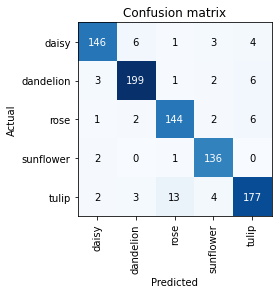

In [7]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

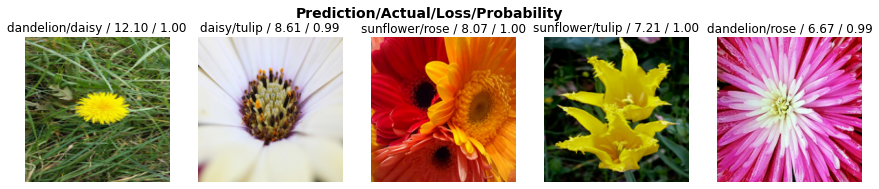

In [8]:
interp.plot_top_losses(5, nrows=1)

In [9]:
learn.export()

In [28]:
learn_inf = load_learner('/content/export.pkl')

In [36]:
def on_click_classify(change):
    img = PILImage.create(btn_upload.data[-1])
    out_pl.clear_output()
    with out_pl: display(img.to_thumb(128,128))
    pred,pred_idx,probs = learn_inf.predict(img)
    lbl_pred.value = f'Prediction: {pred}; Probability: {probs[pred_idx]:.04f}'

btn_run.on_click(on_click_classify)

In [37]:
btn_upload = widgets.FileUpload()

In [38]:
VBox([widgets.Label('Insert a flower!'), 
      btn_upload, btn_run, out_pl, lbl_pred])